# **Imports**

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Utility Functions**

In [196]:
def Bi_Var_Norm(x, mu, cov):
  return np.exp(-np.dot(np.dot((x-mu),np.linalg.inv(cov)),(x-mu).T)/2.)/(2 * np.pi * np.linalg.det(cov)) #Return a bi-variate of the given x, mean and cov

In [197]:
def gmm(x, p = 0):
  for i in range(k):
    p += Bi_Var_Norm(x, mu[i], cov[i]) #x, mean and cov, summing over K bi-variates
  return p/k

In [198]:
def MHA(init_g, c = 1):
  arr = [] # storing the values 
  cur_ = np.random.multivariate_normal(init_g, sigma * np.eye(2))
  arr.append(cur_)
  while(c<n):
    nxt_ = np.random.multivariate_normal(cur_, sigma * np.eye(2))
    if np.random.uniform(0,1) < (min(gmm(nxt_)/gmm(cur_),1)):
      cur_ = nxt_
      arr.append(cur_)
      c+=1
  return np.array(arr)

# **Inputs**

In [200]:
global n
global k
global sigma

n = int(input("Enter the number of samples you want to draw: "))
k = int(input("Enter the number of gaussians you want in the GMM: "))
sigma = float(input("Enter the value of sigma: "))

mu = [np.array([2*i, 3*i]) for i in range(1,k+1)]
cov = [0.5*np.sqrt(i)*np.eye(2) for i in range(1,k+1)]

mu = np.array(mu)

Enter the number of samples you want to draw: 500
Enter the number of gaussians you want in the GMM: 5
Enter the value of sigma: 1.6


# **Generate Plots**

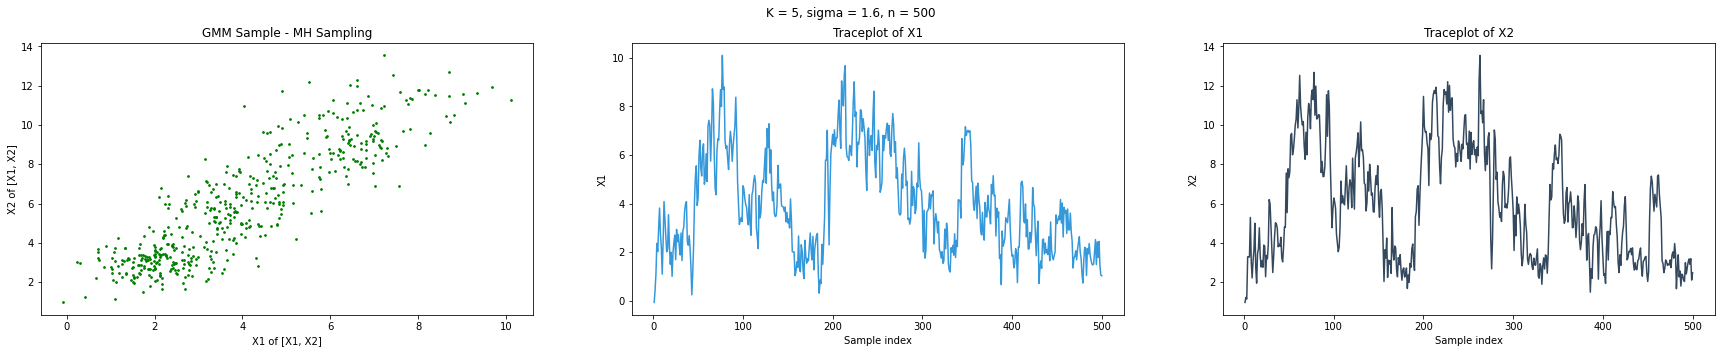

In [201]:
init_g = np.array([0.5,1.2])
data = MHA(init_g)
x = [i+1 for i in range(n)]

f, axarr = plt.subplots(nrows=1,ncols=3, figsize=[30,5])
f.suptitle('K = {}, sigma = {}, n = {}'.format(k, sigma, n))
plt.sca(axarr[0]);
plt.title('GMM Sample - MH Sampling')
plt.ylabel('X2 of [X1, X2]')
plt.xlabel('X1 of [X1, X2]')
plt.scatter(data[:,0],data[:,1], color='green', s=3.0)
plt.savefig('MHA_GMM.png')
plt.sca(axarr[1]); 
plt.title('Traceplot of X1')
plt.ylabel('X1')
plt.xlabel('Sample index')
plt.plot(x, data[:,0], '#3498db')
plt.savefig('Trace_X1.png')
plt.sca(axarr[2]); 
plt.title('Traceplot of X2')
plt.ylabel('X2')
plt.xlabel('Sample index')
plt.plot(x, data[:,1], '#34495e')
plt.savefig('Trace_X2.png')
plt.show()